<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/11_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [ ]:
customers = pd.read_csv('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/Ecommerce Customers')

In [ ]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns

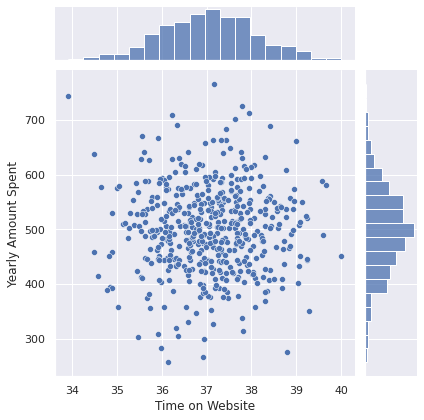

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.show()

Do the same but with the Time on App column instead.

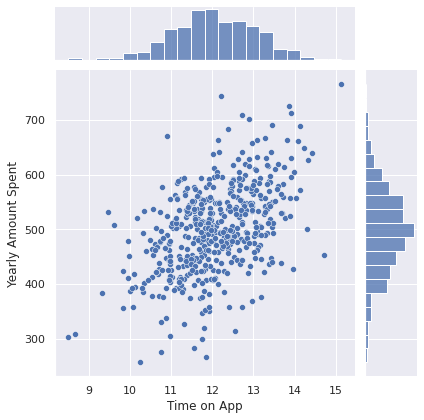

In [ ]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, kind='scatter')
plt.show()

Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership

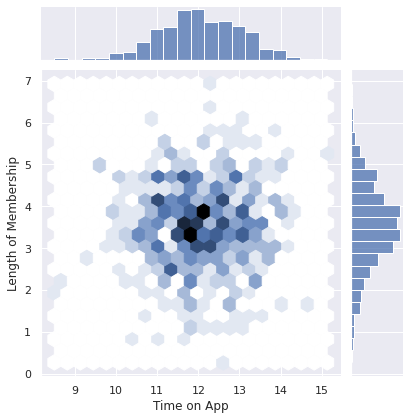

In [ ]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')
plt.show()

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below

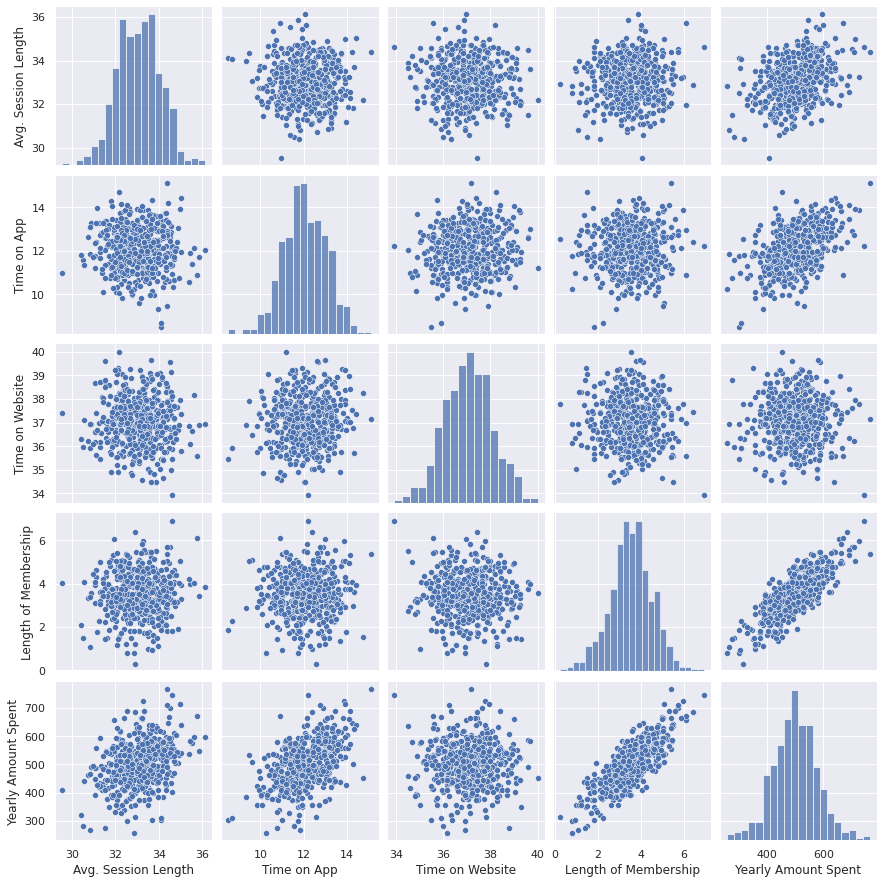

In [ ]:
sns.pairplot(customers)
plt.show()

Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

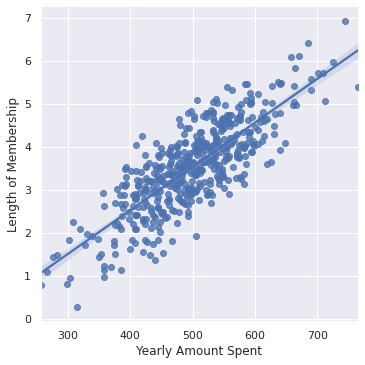

In [ ]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)
plt.show()

Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column

In [ ]:
x = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

Now its time to train our model on our training data!

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-1047.932782250239
[25.98154972 38.59015875  0.19040528 61.27909654]


 Create a scatterplot of the real test values versus the predicted values.

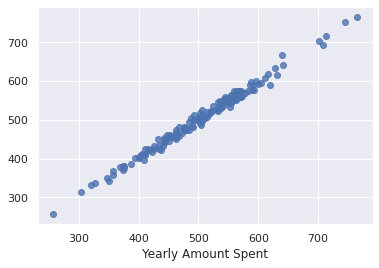

In [ ]:
predictions = lm.predict(x_test)

sns.regplot(x=y_test, y=predictions, fit_reg=False)
plt.ticklabel_format(style='plain')
plt.show()

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas

In [ ]:
from sklearn import metrics

print('MAE: ' + str(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


Plot a histogram of the residuals and make sure it looks normally distributed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


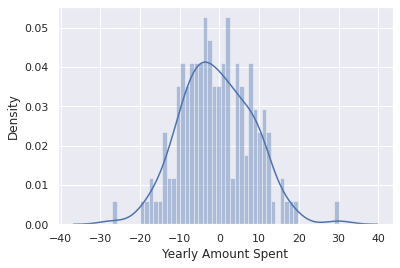

In [ ]:
sns.distplot((y_test-predictions),bins=50)
plt.ticklabel_format(style='plain')
plt.show()

Recreate the dataframe below

In [ ]:
coef_df = pd.DataFrame(lm.coef_, index = x.columns, columns=['Coefficient'])
print(coef_df)

                      Coefficient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097
